<a href="https://colab.research.google.com/github/saurater/deeplearningwithsamfaraday/blob/main/ML_TF_CNN_Image_Augmentation_CallBacks_III.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

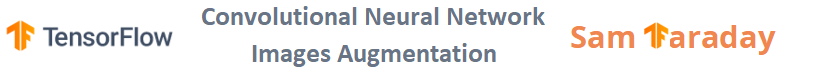

# Neural Networks, CNN - Convolutional Neural Network and Callbacks

Before you start working this notebook, please make sure you see this [Play List](https://www.youtube.com/watch?v=aircAruvnKk&list=PLku20RxmCw282UoYgfhIlrH4ja62vGb5n)

# Marathon Class

Please Visit [Deep Learning Marathon Class 3 With Sam Faraday and Josh](https://www.youtube.com/watch?v=KXl7S0-7kt8)  for a 180 minutes lesson

## Thanks to:
1. [**Laurence Moroney**](https://www.linkedin.com/in/laurence-moroney/) - AI Lead at Google 
2. [**Andrew Ng**](https://www.linkedin.com/in/andrewyng/) - Founder of DeepLearning.AI

For their wonderful classes at DeepLearning AI
3. [**Joshua Olalemi** ](https://www.linkedin.com/in/joshua-olalemi/) - Data Scientist - For his support



# Install Libraries

**wget** Library used to download files

In [18]:
pip install wget

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Import Libraries

 **wget** Library used to download files
 
 pip install wget

In [19]:
import wget 

**os** Operatyng System functions like delete, copy.

In [20]:
import os

The **shutil** module offers a number of high-level operations on files and collections of files.

   In particular, functions are provided which support file copying and removal
 

In [21]:
import shutil

**zipfile** The ZIP file format is a common archive and compression standard. 

This module provides tools to create, read, write, append, and list a ZIP file

In [22]:
import zipfile

**Matplotlib** is a comprehensive library for creating static, animated, and interactive visualizations in Python

**pyplot** is a collection of functions that make matplotlib work like MATLAB. 
    Each pyplot function makes some change to a figure: e.g., creates a figure, 
    creates a plotting area in a figure, plots some lines in a plotting area, 
    decorates the plot with labels, etc.

In [23]:
import matplotlib.pyplot as plt

**matplotlib.image** The image module supports basic image loading, rescaling and display operations

In [24]:
import matplotlib.image as mpimg

**os.environ['TF_CPP_MIN_LOG_LEVEL']** 
To disable all logging output from TensorFlow, set the following environment variable before launching Python.

Please see the verbosity according to the value of TF_CPP_MIN_LOG_LEVEL:

0 = all messages are logged (default behavior)

1 = INFO messages are not printed

2 = INFO and WARNING messages are not printed

3 = INFO, WARNING, and ERROR messages are not printed

In [25]:
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

**TensorFlow** is a free and open-source software library for machine learning and artificial intelligence. It can be used across a range of tasks but has a particular focus on training and inference of deep neural networks.

In [26]:
import tensorflow as tf

**Keras ImageDataGenerator** generates batches of tensor image data with real-time data augmentation.

In [27]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

**Keras EarlyStopping** stops training when a monitored metric has stopped improving

In [28]:
from keras.callbacks import EarlyStopping

# Acquire Images

In [29]:
wget.download("https://storage.googleapis.com/tensorflow-1-public/course2/cats_and_dogs_filtered.zip")

'cats_and_dogs_filtered.zip'

# Unzip files

In [30]:
zip_ref = zipfile.ZipFile("cats_and_dogs_filtered.zip", 'r')
zip_ref.extractall('./')

# Get rid of vectorize.py , unnecessary file

In [31]:
 if os.path.exists("./cats_and_dogs_filtered/vectorize.py"):
        os.remove("./cats_and_dogs_filtered/vectorize.py")


# Change Working directory

**! ls** - It Lists the Directory Content - Please note the ! sign, it means it a a Linux Command

**os.getcwd()** - it gets the working directory

**os.chdir("dyrectory path")** It changes the working directory



In [32]:
!ls

cats_and_dogs_filtered	cats_and_dogs_filtered.zip  sample_data


In [33]:
print(os.getcwd()) # get working directory

/content


In [34]:
os.chdir("/content/") # change working directory

# Create Working Directories Variables

In [35]:
base_dir = '/content/cats_and_dogs_filtered'

In [36]:
!ls

cats_and_dogs_filtered	cats_and_dogs_filtered.zip  sample_data


In [37]:
train_dir = os.path.join(base_dir, "train")

In [38]:
validation_dir = os.path.join(base_dir, "validation")

In [39]:
train_cats_dir = os.path.join(train_dir, "cats")

In [40]:
train_dogs_dir = os.path.join(train_dir, "dogs")

In [41]:
train_dogs_dir

'/content/cats_and_dogs_filtered/train/dogs'

In [42]:
validation_cats_dir = os.path.join(validation_dir, 'cats')

In [43]:
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

# Check Directories Length

In [44]:
print("total training cats images: ", len(os.listdir(train_cats_dir)))

total training cats images:  1000


In [45]:
print("total training dogs images: ", len(os.listdir(train_dogs_dir)))

total training dogs images:  1000


In [46]:
print("total validation cats images: ", len(os.listdir(validation_cats_dir)))

total validation cats images:  500


In [47]:
print("total validation dogs images: ", len(os.listdir(validation_dogs_dir)))

total validation dogs images:  500


# Show Images

In [48]:
# Parameters for our graph; we'll output images in a 4x4 configuration
number_Of_rows = 4
number_of_columns = 4

In [49]:
fig = plt.gcf()  # Set up matplotlib fig
fig.set_size_inches(number_of_columns * 4, number_Of_rows * 4)  # then size it to fit 4x4 pics

<Figure size 1152x1152 with 0 Axes>

In [50]:
train_cats_names = os.listdir(train_cats_dir)

In [51]:
train_dogs_names = os.listdir(train_dogs_dir)

In [52]:
train_cats_names[0:5]

['cat.493.jpg', 'cat.987.jpg', 'cat.747.jpg', 'cat.671.jpg', 'cat.961.jpg']

In [53]:
picture_index = 0

In [54]:
# It is ussed to increment the picture index so you see new pictures 
# every time you run it from this line

picture_index += 8 

In [55]:
next_cat_pix = [os.path.join(train_cats_dir, fname)  # create a list with 8 horses pictures
                  for fname in train_cats_names[picture_index-8:picture_index]]

In [56]:
next_dog_pix = [os.path.join(train_dogs_dir, fname)  # create a list with 8 human pictures
                  for fname in train_dogs_names[picture_index-8:picture_index]]


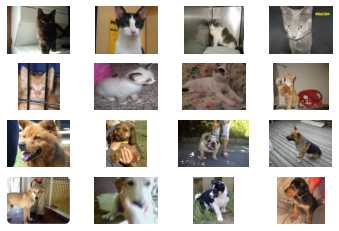

In [57]:
for i, img_path in enumerate(next_cat_pix+next_dog_pix):
    sp = plt.subplot(number_Of_rows, number_of_columns, i + 1)  # Set up subplot; subplot indices start at 1
    sp.axis('Off')  # Don't show axes (or gridlines)

    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()

# Create Deep Neural Netwrok Model
In this exercise, we are creating a Sequential Model with:


1.   3 Convolutional Layers (tf.keras.layers.Conv2D)
     
     Convolutional layers are the layers where filters are applied to the original image, or to other feature maps in a deep CNN. This is where most of the user-specified parameters are in the network. The most important parameters are the number of kernels and the size of the kernels. (Matthew Stewart - Simple Introduction to Convolutional Neural Networks [link text](https://towardsdatascience.com/simple-introduction-to-convolutional-neural-networks-cdf8d3077bac#:~:text=Convolutional%20layers%20are%20the%20layers,the%20size%20of%20the%20kernels.))


2.   3 Maxpooling Layers (tf.keras.layers.MaxPooling2D)
3.   3 [Dropout Layers](https://machinelearningmastery.com/dropout-regularization-deep-learning-models-keras/) (tf.keras.layers.Dropout)
4.   1 Flatten Layer (tf.keras.layers.Flatten)
5.   1 Hidden Layer(tf.keras.layers.Dense(128, activation='relu')
6.   1 Output Layer (tf.keras.layers.Dense(1, activation='sigmoid')
7.   [2 Activation Functions - relu and sigmoid](https://www.youtube.com/watch?v=m0pIlLfpXWE&list=PLku20RxmCw282UoYgfhIlrH4ja62vGb5n&index=5)






In [58]:
seqmodel = tf.keras.models.Sequential([ tf.keras.layers.Conv2D(32,(3, 3), activation='relu', input_shape=(150,150,3) ),
                                       tf.keras.layers.MaxPooling2D(2,2),
                                       tf.keras.layers.Conv2D(64,(3, 3), activation='relu' ),
                                       tf.keras.layers.MaxPooling2D(2,2),
                                       tf.keras.layers.Conv2D(128,(3, 3), activation='relu' ),
                                       tf.keras.layers.Dropout(0.25),
                                       tf.keras.layers.MaxPooling2D(2,2),
                                       tf.keras.layers.Dropout(0.25),
                                       tf.keras.layers.Flatten(),
                                       tf.keras.layers.Dense(128, activation='relu'),
                                       tf.keras.layers.Dropout(0.5),
                                       tf.keras.layers.Dense(1, activation='sigmoid')
    
      
                              ])

Show **Model Summary**

In [59]:
seqmodel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 dropout (Dropout)           (None, 34, 34, 128)       0

In [60]:
seqmodel.compile(loss="binary_crossentropy",
                 optimizer="adam",
                 metrics=['accuracy'])

# ImageDataGenerator

  Calling ([image_dataset_from_directorymain_directory, labels='inferred')](https://keras.io/api/preprocessing/image/)  will return a tf.data.Dataset that yields batches of images from the subdirectories class_a and class_b, together with labels 0 and 1 (0 corresponding to class_a and 1 corresponding to class_b). 

## Image Augmentation
Image augmentation is a process of creating new training examples from the existing ones. To make new samples, you slightly change the original images by, for instance, horizontally or vertically flipping the images, rotating or zooming them.

Please see the [Notebook Image Augmentation](https://github.com/saurater/deeplearningwithsamfaraday/blob/main/Tensorflow_Image_Augmentation.ipynb) for further details and hands-on work. 

In [61]:
train_data_gen = ImageDataGenerator(rescale=1. / 255,
                                    rotation_range=15,
                                    width_shift_range=0.1,
                                    height_shift_range=0.1,
                                    shear_range=0.1,
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    fill_mode='nearest')

In [62]:
validation_datagen = ImageDataGenerator(rescale=1./255.)

In [63]:
train_grenerator = train_data_gen.flow_from_directory('./cats_and_dogs_filtered/train/',
target_size=(150,150),
batch_size=20,
class_mode='binary')

Found 2000 images belonging to 2 classes.


In [64]:
validation_generator = validation_datagen.flow_from_directory('./cats_and_dogs_filtered/validation/',
                                                              target_size=(150,150),
batch_size=20,
class_mode='binary')

Found 1000 images belonging to 2 classes.


# Train the Model

## Early Stop
**Keras EarlyStopping** stops training when a monitored metric has stopped improving. In this case, we have set patiece=5, with means the system will stop training the model in case, after 5 epochs no better accuracy is reached.

In [65]:
es = EarlyStopping(patience=5, 
                   monitor='val_accuracy', 
                   mode='max', 
                   verbose=1, 
                   restore_best_weights=True)

## Model Training

In [66]:
history= seqmodel.fit(train_grenerator, 
             steps_per_epoch=100,
             epochs=50, 
             verbose=1,
             validation_data=validation_generator,
             validation_steps=8,
             shuffle=True,
             callbacks=[es]) # callbacks will run the Early Stop defined in the previous cell

Epoch 1/50
100/100 [==============================] - 30s 155ms/step - loss: 0.7022 - accuracy: 0.5225 - val_loss: 0.7022 - val_accuracy: 0.4062
Epoch 2/50
100/100 [==============================] - 15s 150ms/step - loss: 0.6785 - accuracy: 0.5690 - val_loss: 0.7169 - val_accuracy: 0.5125
Epoch 3/50
100/100 [==============================] - 15s 150ms/step - loss: 0.6733 - accuracy: 0.5835 - val_loss: 0.6552 - val_accuracy: 0.6187
Epoch 4/50
100/100 [==============================] - 16s 159ms/step - loss: 0.6629 - accuracy: 0.5890 - val_loss: 0.6465 - val_accuracy: 0.6250
Epoch 5/50
100/100 [==============================] - 16s 163ms/step - loss: 0.6548 - accuracy: 0.6020 - val_loss: 0.6282 - val_accuracy: 0.6500
Epoch 6/50
100/100 [==============================] - 24s 244ms/step - loss: 0.6353 - accuracy: 0.6400 - val_loss: 0.6088 - val_accuracy: 0.7250
Epoch 7/50
100/100 [==============================] - 18s 175ms/step - loss: 0.6151 - accuracy: 0.6640 - val_loss: 0.6011 - val_ac

# Check Metrics

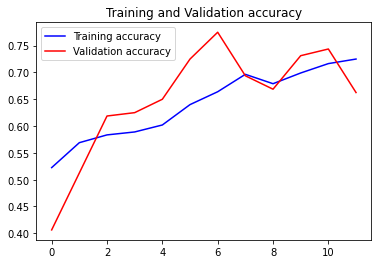

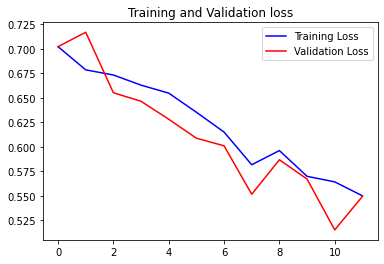

In [67]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

# Save the Model

In [68]:
seqmodel.save('./mymodel.h5', save_format="h5")